# Download images

In [ ]:
import pandas as pd

# https://github.com/unitedstates/congress-legislators
df = pd.read_csv("https://theunitedstates.io/congress-legislators/legislators-current.csv")
df.head(2)

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,district,senate_class,party,url,address,phone,contact_form,rss_url,twitter,facebook,youtube,youtube_id,bioguide_id,thomas_id,opensecrets_id,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,Brown,Sherrod,NaN,NaN,NaN,Sherrod Brown,1952-11-09,M,sen,OH,NaN,1.0,Democrat,https://www.brown.senate.gov,503 Hart Senate Office Building Washington DC ...,202-224-2315,http://www.brown.senate.gov/contact/,http://www.brown.senate.gov/rss/feeds/?type=al...,SenSherrodBrown,SenatorSherrodBrown,SherrodBrownOhio,UCgy8jfERh-t_ixkKKoCmglQ,B000944,136.0,N00003535,S307,"H2OH13033,S6OH00163",5051.0,400050,27018.0,Sherrod Brown,NaN,29389.0,Sherrod Brown
1,Cantwell,Maria,NaN,NaN,NaN,Maria Cantwell,1958-10-13,F,sen,WA,NaN,1.0,Democrat,https://www.cantwell.senate.gov,511 Hart Senate Office Building Washington DC ...,202-224-3441,http://www.cantwell.senate.gov/public/index.cf...,http://www.cantwell.senate.gov/public/index.cf...,SenatorCantwell,senatorcantwell,SenatorCantwell,UCN52UDqKgvHRk39ncySrIMw,C000127,172.0,N00007836,S275,"S8WA00194,H2WA01054",26137.0,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell


In [ ]:
# Install a special version because 
# https://stackoverflow.com/questions/60370799/google-image-download-with-python-cannot-download-images
!pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-pljznqcq
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-pljznqcq


In [ ]:
import unicodedata
import os
from google_images_download import google_images_download

def strip_accents(text):
  return unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")

# If you just had a normal list, you could use
# for search_term in ['term a', 'term b', 'term c']
for index, person in df.iterrows():
    search_term = f"{person['first_name']} {person['last_name']}"
    search_term = strip_accents(search_term)

    cleaned = search_term.replace(' ','_').lower()
    folder = f"downloads/{cleaned}"

    if os.path.isdir(folder):
      print(folder, "exists: skipping")
      continue

    downloader = google_images_download.googleimagesdownload()
    details = {
        'limit': 5,
        'keywords': search_term,
        'format': 'jpg',
        'color_type': 'full-color',
        'type': 'photo',
        'image_directory': cleaned
    }

    downloader.download(details)

downloads/sherrod_brown exists: skipping

Item no.: 1 --> Item name = Maria Cantwell
Evaluating...
Starting Download...
Completed Image ====> 1..jpg
Completed Image ====> 2.2jlypccc.jpg
Completed Image ====> 3.maria-cantwell-2006.jpg
Completed Image ====> 4.cantwellmaria_gregnash.jpg
Completed Image ====> 5.maria_cantwell.jpg

Errors: 0


Item no.: 1 --> Item name = Benjamin Cardin
Evaluating...
Starting Download...
Completed Image ====> 1.ben_cardin_official_senate_portrait.jpg
Completed Image ====> 2.ben-cardin.jpg
Completed Image ====> 3.cover_rotator-1.jpg
Completed Image ====> 4.400064-200px.jpeg
Completed Image ====> 5.115_sr_md_cardin_benjamin.jpg

Errors: 0


Item no.: 1 --> Item name = Thomas Carper
Evaluating...
Starting Download...
Completed Image ====> 1.tom_carper%2c_official_portrait%2c_112th_congress.jpg
Completed Image ====> 2.tom_carper.jpg
Completed Image ====> 3.300019-200px.jpeg
Completed Image ====> 4.77d2bd85a246e66e8f77670018fbaaca_400x400.jpeg
Completed Image ==

KeyboardInterrupt: ignored

In [ ]:
!apt install imagemagick

In [ ]:
!ls -la downloads/darrell_issa

In [ ]:
!mogrify  -resize 1080x1080\> downloads/**/*.jpg

In [ ]:
!zip -r images.zip downloads

Streaming output truncated to the last 5000 lines.
  adding: downloads/chris_jacobs/11.77e08247-2638-4b50-28f3-93021944599d-77e0824726384b5028f393021944599dchrisjacobsweb-2.jpg (deflated 0%)
  adding: downloads/chris_jacobs/24.78aafa68-3455-45f1-bd60-efd8a2e85e35_1920x1080.jpg (deflated 0%)
  adding: downloads/chris_jacobs/7.buffalo_clj.jpg (deflated 0%)
  adding: downloads/chris_jacobs/13.5f893a70f3630.image.jpg (deflated 0%)
  adding: downloads/chris_jacobs/1.b948f602dc824089b6b71b5168cc0eef.jpg (deflated 1%)
  adding: downloads/chris_jacobs/12.80928981b267708cb6d5647f5ae97b35.jpg (deflated 1%)
  adding: downloads/chris_jacobs/10.chris-jacobs.jpg.webp (deflated 0%)
  adding: downloads/chris_jacobs/21.chris%20jacobs.jpg (deflated 0%)
  adding: downloads/chris_jacobs/28.p-4f02ea5223b6fe2172338d2900a6ec4ee4b488165fe12b9c5daedd7fc7fd7868335a6b1668267639824d31651d9b36b79dcdb5c45b0dc41ca3c278fff48d7d84.jp-th.jpg (deflated 1%)
  adding: downloads/chris_jacobs/27.8cd0816e14ea567728203ffa9452

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp images.zip /content/gdrive/MyDrive/

In [ ]:
from google.colab import files
files.download('images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#!ls -la /content/gdrive/MyDrive --block-size=MB

## Did we get them?

In [ ]:
!ls downloads/

amy_klobuchar	  james_inhofe	  maria_cantwell   roger_wicker
benjamin_cardin   john_barrasso   mitch_mcconnell  sheldon_whitehouse
bernard_sanders   john_cornyn	  richard_durbin   sherrod_brown
debbie_stabenow   jon_tester	  robert_casey	   susan_collins
dianne_feinstein  lindsey_graham  robert_menendez  thomas_carper


In [ ]:
import glob
import numpy as np

filenames = glob.glob("downloads/**/*")
filenames[:5]

['downloads/sheldon_whitehouse/5.https%3a%2f%2fcdn.cnn.com%2fcnnnext%2fdam%2fassets%2f210622164114-sheldon-whitehouse-sunlen-lead-vpx.jpg',
 'downloads/sheldon_whitehouse/3.sheldon-whitehouse.jpg',
 'downloads/sheldon_whitehouse/1.sheldon_whitehouse%2c_official_portrait%2c_116th_congress.jpg',
 'downloads/sheldon_whitehouse/4.im-244593.jpg',
 'downloads/sheldon_whitehouse/2.sheldon-whitehouse-2007.jpg']

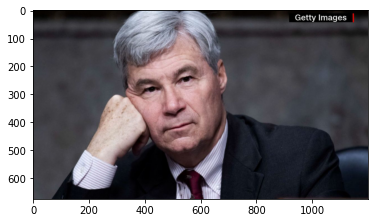

In [ ]:
import matplotlib.pyplot as plt

filename = filenames[0]

image = plt.imread(filename)
plt.imshow(image)

# Face detection

In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 7.7 MB/s 


In [ ]:
from mtcnn import MTCNN

filename = filenames[0]

image = plt.imread(filename)
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(image)
for face in faces:
  print(face)

{'box': [335, 94, 336, 426], 'confidence': 0.9999194145202637, 'keypoints': {'left_eye': (422, 284), 'right_eye': (549, 245), 'nose': (499, 352), 'mouth_left': (469, 435), 'mouth_right': (584, 403)}}


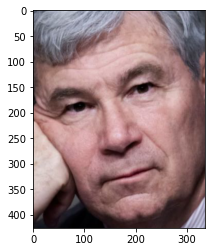

In [ ]:
faces = detector.detect_faces(image)

# Let's cut it out using the power of MATH STUFF
x1, y1, width, height = faces[0]['box']
x1 = max(x1, 0)
y1 = max(y1, 0)
x2, y2 = x1 + width, y1 + height
face = image[y1:y2, x1:x2]
plt.imshow(face)

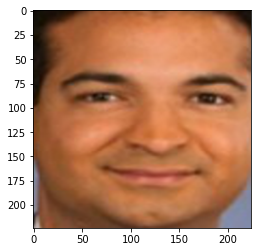

In [ ]:
# We need to resize it to 224x224 because
# THAT'S WHAT NEURAL NETS ALWAYS (sometimes) USE
from PIL import Image

face = face.resize((224, 224))
face = np.asarray(face)
plt.imshow(face)

In [ ]:
# We'll write a function to do it so we can be
# lazy, and sometimes so we can ask for multiples
detector = MTCNN()

def get_faces(filename):
  image = plt.imread(filename)
  faces_coords = detector.detect_faces(image)

  faces = []
  for coords in faces_coords:
    x1, y1, width, height = coords['box']
    x1 = max(x1, 0)
    y1 = max(y1, 0)
    x2, y2 = x1 + width, y1 + height
    face = image[y1:y2, x1:x2]
    face = Image.fromarray(face).resize((224, 224))
    face = np.asarray(face)
    faces.append(face)

  return faces

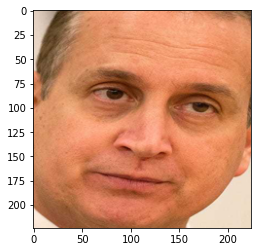

In [ ]:
# Test that it worked
faces = get_faces(filenames[4])
plt.imshow(faces[0])

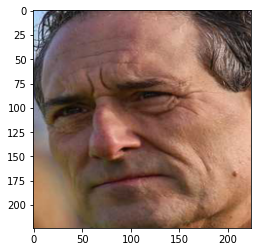

In [ ]:
faces = get_faces(filenames[70])
plt.imshow(faces[0])

# Create face images

In [ ]:
# We just want images of faces, because one folder = one thing
# we'll just grab a face out of each picture and save it into
# a folder called /faces/

# Get the face
# Figure out the new place to save the file
# Save it
# (if it ever didn't find a face it would break!!)
import os

for filename in filenames:
  try:
    faces = get_faces(filename)
    for i, face in enumerate(faces):
      # Pull their name and the base filename out of the filename
      person_name = os.path.dirname(filename).split("/")[-1]
      base_name = os.path.basename(filename)
      target_filename = f"faces/{person_name}/{i}_face_{base_name}"

      print("Saving to", target_filename)

      # Make sure the folder exists
      folder = os.path.dirname(target_filename)
      os.makedirs(folder, exist_ok=True)

      # Save the file
      plt.imsave(target_filename, face)
  except:
    pass

Streaming output truncated to the last 5000 lines.
Saving to faces/joe_wilson/0_face_22.20201216140658001_hd.jpg
Saving to faces/joe_wilson/0_face_15.3e2w7zdrjjliphe56cv6igmjxm.jpg
Saving to faces/joe_wilson/0_face_10.4765elmis5bcjcatnyvy4kyrva.jpg.webp
Saving to faces/joe_wilson/1_face_10.4765elmis5bcjcatnyvy4kyrva.jpg.webp
Saving to faces/joe_wilson/2_face_10.4765elmis5bcjcatnyvy4kyrva.jpg.webp
Saving to faces/joe_wilson/3_face_10.4765elmis5bcjcatnyvy4kyrva.jpg.webp
Saving to faces/joe_wilson/4_face_10.4765elmis5bcjcatnyvy4kyrva.jpg.webp
Saving to faces/joe_wilson/0_face_29.maxresdefault.jpg
Saving to faces/joe_wilson/0_face_5.w000795.jpg
Saving to faces/joe_wilson/0_face_17.20179175_g.jpeg
Saving to faces/joe_wilson/0_face_6.a_flashback_outbursts_150130.jpg
Saving to faces/joe_wilson/1_face_6.a_flashback_outbursts_150130.jpg
Saving to faces/joe_wilson/2_face_6.a_flashback_outbursts_150130.jpg
Saving to faces/joe_wilson/0_face_27.72234e00-08e9-434b-8182-a135b11c70f6-large1x1_c0f419aa

In [ ]:
!zip -r faces.zip faces

Streaming output truncated to the last 5000 lines.
  adding: faces/antonio_delgado/0_face_16.antonio_delgado_apfilejpg.jpg (deflated 2%)
  adding: faces/antonio_delgado/0_face_2.imkyeto0_400x400.jpg (deflated 2%)
  adding: faces/antonio_delgado/0_face_20.44920421_634056873657629_211051553304346624_n.jpg (deflated 4%)
  adding: faces/antonio_delgado/0_face_15.screen_shot_2018_07_18_at_9.23.24_am.0.png.jpg (deflated 3%)
  adding: faces/antonio_delgado/3_face_25.70b8abf6168d2345-1495034871082.jpg (deflated 4%)
  adding: faces/antonio_delgado/1_face_17.180511_antonio_delgado_0725-1145x700.jpg (deflated 3%)
  adding: faces/antonio_delgado/0_face_17.180511_antonio_delgado_0725-1145x700.jpg (deflated 2%)
  adding: faces/antonio_delgado/7_face_23.img_0105.jpeg (deflated 4%)
  adding: faces/antonio_delgado/1_face_13.delgado-e1541470468313-1024x640.jpg (deflated 2%)
  adding: faces/antonio_delgado/3_face_21.im-245737.jpg (deflated 6%)
  adding: faces/antonio_delgado/0_face_10.img_8096.jpg (defla

In [ ]:
!cp faces.zip /content/gdrive/MyDrive/

In [ ]:
# Look at all the faces!
face_filenames = glob.glob("faces/**/*")
face_filenames[:20]

['faces/mario_diaz-balart/0_face_19..jpg',
 'faces/mario_diaz-balart/1_face_21.200318205503-diaz-balart-mcadams-split-super-tease.jpg',
 'faces/mario_diaz-balart/0_face_17.img_2657.jpg',
 'faces/mario_diaz-balart/12_face_12.trump-cuba-1.jpg',
 'faces/mario_diaz-balart/0_face_18.curbelo-diaz-balart.jpg',
 'faces/mario_diaz-balart/0_face_2.mario_diaz_balart.jpg',
 'faces/mario_diaz-balart/11_face_12.trump-cuba-1.jpg',
 'faces/mario_diaz-balart/10_face_12.trump-cuba-1.jpg',
 'faces/mario_diaz-balart/3_face_12.trump-cuba-1.jpg',
 'faces/mario_diaz-balart/2_face_17.img_2657.jpg',
 'faces/mario_diaz-balart/0_face_21.200318205503-diaz-balart-mcadams-split-super-tease.jpg',
 'faces/mario_diaz-balart/0_face_8.d000600.jpg',
 'faces/mario_diaz-balart/0_face_27.636084256040230981-0219-nclo-mario-diaz-balart-002.jpg',
 'faces/mario_diaz-balart/0_face_30.unnamed.jpg',
 'faces/mario_diaz-balart/0_face_11.636084256184375905-0219-nclo-mario-diaz-balart-006.jpg',
 'faces/mario_diaz-balart/1_face_30.unna

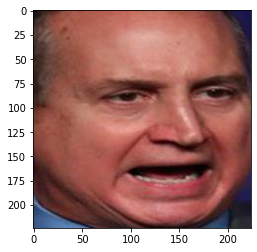

In [ ]:
image = plt.imread(face_filenames[0])
plt.imshow(image)

# Learn

In [ ]:
# Magic numbers for success
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Magic code for success
data_dir = 'faces'
datagen_kwargs = dict(rescale=1./255, validation_split=.10)
dataflow_kwargs = dict(target_size=IMG_SIZE, interpolation="bilinear")

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=5,
    horizontal_flip=True,
    width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2,
    **datagen_kwargs)

train_generator = train_datagen.flow_from_directory(
    data_dir, subset="training", shuffle=True, **dataflow_kwargs)

Found 2777 images belonging to 536 classes.
Found 27391 images belonging to 536 classes.


In [ ]:
# We're going to use a PRE-TRAINED MODEL
# This one probably isn't any good with faces though let's be honest

base_model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"

model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMG_SIZE + (3,)),
    hub.KerasLayer(base_model_url, trainable=False),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes,
                          activation='softmax')
])
model.build((None,)+IMG_SIZE+(3,))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 536)               686616    
Total params: 2,944,600
Trainable params: 686,616
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size
hist = model.fit(
    train_generator,
    epochs=30, steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps).history

Epoch 1/30
115/855 [===>..........................] - ETA: 19:03 - loss: 6.6645 - accuracy: 0.0035

KeyboardInterrupt: ignored

# Use the model

In [ ]:
import requests

image_url = "https://d1e00ek4ebabms.cloudfront.net/production/64e12d25-a1ae-4381-aa7b-6fc8cc01fd96.jpg"
# Request the profile picture of the OP:
response = requests.get(image_url)
with open("image.jpg", "wb") as f:
    f.write(response.content)


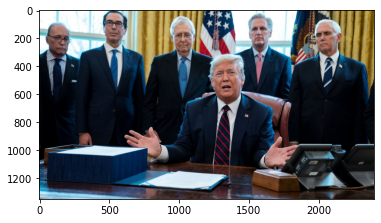

In [ ]:
image = plt.imread("image.jpg")
plt.imshow(image)

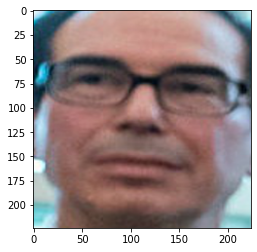

In [ ]:
faces = get_face('image.jpg', multiple=True)
plt.imshow(faces[0])

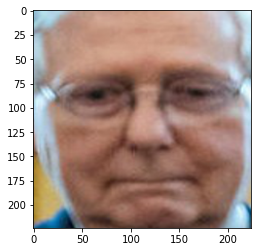

In [ ]:
plt.imshow(faces[1])

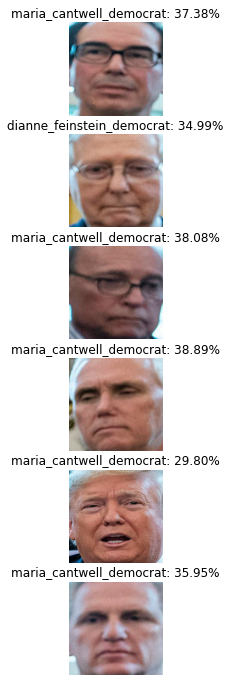

In [ ]:
face_count = len(faces)
fig, axes = plt.subplots(face_count, figsize=(2, 2 * face_count))

class_names = list(train_generator.class_indices.keys())
predictions = model.predict(np.array(faces))

for face, preds, ax in zip(faces, predictions, axes):
  ax.imshow(face)
  
  top = np.argmax(preds)
  pred_pct = preds[top]
  label = class_names[top]
  ax.set_title(f"{label}: {pred_pct:.2%}")
  ax.axis('off')
